In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\Owner'

In [3]:
df = pd.read_csv(r"C:\\Users\\Owner\Desktop\nls_2019.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,5.78,6.20,5.75,6.00,6.00,555300
1,2008-08-11,5.67,6.06,5.67,5.90,5.90,406100
2,2008-08-12,5.87,5.99,5.62,5.80,5.80,344500
3,2008-08-13,5.69,5.86,5.31,5.55,5.55,568600
4,2008-08-14,5.53,5.79,5.44,5.59,5.59,390400
...,...,...,...,...,...,...,...
2863,2019-12-23,1.73,1.84,1.71,1.78,1.78,386100
2864,2019-12-24,1.77,1.82,1.76,1.77,1.77,129600
2865,2019-12-26,1.75,1.78,1.67,1.67,1.67,349700
2866,2019-12-27,1.65,1.70,1.63,1.67,1.67,281800


In [4]:
df_d = df.reset_index()['Date']

In [5]:
df_d

0       2008-08-08
1       2008-08-11
2       2008-08-12
3       2008-08-13
4       2008-08-14
           ...    
2863    2019-12-23
2864    2019-12-24
2865    2019-12-26
2866    2019-12-27
2867    2019-12-30
Name: Date, Length: 2868, dtype: object

In [6]:
df_h = df.reset_index()['Low']
df_h

0       5.75
1       5.67
2       5.62
3       5.31
4       5.44
        ... 
2863    1.71
2864    1.76
2865    1.67
2866    1.63
2867    1.65
Name: Low, Length: 2868, dtype: float64

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,5.78,6.20,5.75,6.00,6.00,555300
1,2008-08-11,5.67,6.06,5.67,5.90,5.90,406100
2,2008-08-12,5.87,5.99,5.62,5.80,5.80,344500
3,2008-08-13,5.69,5.86,5.31,5.55,5.55,568600
4,2008-08-14,5.53,5.79,5.44,5.59,5.59,390400


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2863,2019-12-23,1.73,1.84,1.71,1.78,1.78,386100
2864,2019-12-24,1.77,1.82,1.76,1.77,1.77,129600
2865,2019-12-26,1.75,1.78,1.67,1.67,1.67,349700
2866,2019-12-27,1.65,1.70,1.63,1.67,1.67,281800
2867,2019-12-30,1.69,1.72,1.65,1.68,1.68,216400


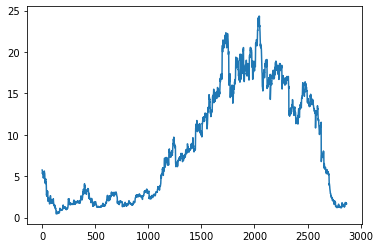

In [9]:
import matplotlib.pyplot as plt
plt.plot(df_h)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_h = scaler.fit_transform(np.array(df_h).reshape(-1,1))
df_h.shape

(2868, 1)

In [12]:
df_h

array([[0.22203603],
       [0.21868454],
       [0.21658986],
       ...,
       [0.05111018],
       [0.04943444],
       [0.05027231]])

In [13]:
trng_size = int(len(df_h) * 0.8)
test_size = len(df_h) - trng_size
train_data = df_h[0:trng_size, :]
test_data = df_h[trng_size: len(df_h), :1]

In [14]:
len(train_data)

2294

In [15]:
import numpy 
def create_dataset(dataset, time_step = 1):
    data_x = []
    data_y = []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i + time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(x_train)

[[0.22203603 0.21868454 0.21658986 ... 0.0548806  0.05446167 0.06493506]
 [0.21868454 0.21658986 0.20360285 ... 0.05446167 0.06493506 0.065354  ]
 [0.21658986 0.20360285 0.20904902 ... 0.06493506 0.065354   0.0712191 ]
 ...
 [0.70171768 0.71219108 0.72056975 ... 0.65144533 0.66610809 0.67029749]
 [0.71219108 0.72056975 0.73732715 ... 0.66610809 0.67029749 0.66736485]
 [0.72056975 0.73732715 0.74361127 ... 0.67029749 0.66736485 0.66820276]]


In [18]:
print(x_train.shape), print(y_train.shape)

(2193, 100)
(2193,)


(None, None)

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [21]:
model = Sequential()
model.add(LSTM(80, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(120))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 80)           26240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          72400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 120)               106080    
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 204,841
Trainable params: 204,841
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 135, batch_size = 64, verbose = 1)

Epoch 1/135
35/35 [==============================] - 15s 414ms/step - loss: 0.0206 - val_loss: 0.0013
Epoch 2/135
35/35 [==============================] - 13s 365ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 3/135
35/35 [==============================] - 13s 365ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/135
35/35 [==============================] - 14s 389ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 5/135
35/35 [==============================] - 13s 380ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/135
35/35 [==============================] - 14s 392ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/135
35/35 [==============================] - 14s 392ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/135
35/35 [==============================] - 14s 411ms/step - loss: 0.0011 - val_loss: 9.9010e-04
Epoch 9/135
35/35 [==============================] - 15s 420ms/step - loss: 8.8070e-04 - val_loss: 0.0015
Epoch 10/135
35/35 [==============================] - 15s 421ms/step - los

In [24]:
import tensorflow as tf

In [25]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [26]:
predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, predict_train))

10.608522393754935

In [28]:
math.sqrt(mean_squared_error(y_test, predict_test))

9.58154034886788

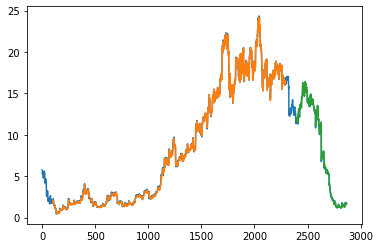

In [29]:
# Shifts train predictions for Plotting 
import numpy
look_back = 100
trainPredictPlot = numpy.empty_like(df_h)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(predict_train) + look_back: ] = predict_train
# Shifts train predictions for Plotting 
testPredictPlot = numpy.empty_like(df_h)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(predict_train) + (look_back*2)  + 1: len(df_h) - 1, : ] = predict_test
plt.plot(scaler.inverse_transform(df_h))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

574

In [31]:
test_input = test_data[474:].reshape(1, -1)
test_input.shape

(1, 100)

In [32]:
temp_input = list(test_input)
temp_input = temp_input[0].tolist()
temp_input

[0.040217846669459566,
 0.038542103058232094,
 0.03602848764139087,
 0.035609551738583996,
 0.033514872224549644,
 0.03309593632174277,
 0.0326770004189359,
 0.0326770004189359,
 0.032258064516129024,
 0.032258064516129024,
 0.032258064516129024,
 0.03183912861332216,
 0.032258064516129024,
 0.032258064516129024,
 0.03309593632174277,
 0.03728529534981148,
 0.03896103896103895,
 0.03435274403016338,
 0.033514872224549644,
 0.034771679932970256,
 0.03602848764139087,
 0.03896103896103895,
 0.040217846669459566,
 0.04775869291998325,
 0.04943443653121071,
 0.046501885211562635,
 0.044407205697528276,
 0.03979891076665269,
 0.03979891076665269,
 0.036447423544197735,
 0.035609551738583996,
 0.03602848764139087,
 0.03812316715542522,
 0.041055718475073305,
 0.03686635944700461,
 0.03686635944700461,
 0.03602848764139087,
 0.03519061583577712,
 0.0326770004189359,
 0.0326770004189359,
 0.03519061583577712,
 0.034771679932970256,
 0.03309593632174277,
 0.03435274403016338,
 0.034771679932970

In [33]:
from numpy import array 

output_lst = []
n_steps = 100
i = 0
while (i < 30):
    if(len(temp_input)>100):
        #print(temp_input)
        test_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,test_input))
        test_input=test_input.reshape(1, -1)
        test_input=test_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(test_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_lst.extend(yhat.tolist())
        i=i+1
    else:
        test_input = test_input.reshape((1, n_steps,1))
        yhat = model.predict(test_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_lst.extend(yhat.tolist())
        i=i+1
print(output_lst)

[0.04811978]
101
1 day input [0.0385421  0.03602849 0.03560955 0.03351487 0.03309594 0.032677
 0.032677   0.03225806 0.03225806 0.03225806 0.03183913 0.03225806
 0.03225806 0.03309594 0.0372853  0.03896104 0.03435274 0.03351487
 0.03477168 0.03602849 0.03896104 0.04021785 0.04775869 0.04943444
 0.04650189 0.04440721 0.03979891 0.03979891 0.03644742 0.03560955
 0.03602849 0.03812317 0.04105572 0.03686636 0.03686636 0.03602849
 0.03519062 0.032677   0.032677   0.03519062 0.03477168 0.03309594
 0.03435274 0.03477168 0.03560955 0.03142019 0.032677   0.03309594
 0.03309594 0.03142019 0.03225806 0.03225806 0.03309594 0.05152912
 0.05194805 0.05655635 0.05655635 0.05236699 0.04985337 0.04985337
 0.05194805 0.05027231 0.04985337 0.04943444 0.0372853  0.03979891
 0.04189359 0.04398827 0.04398827 0.04021785 0.04105572 0.04063678
 0.04063678 0.0385421  0.03770423 0.04063678 0.03812317 0.03602849
 0.03937997 0.03686636 0.03644742 0.03937997 0.04775869 0.04985337
 0.05236699 0.05529954 0.05571848 0

In [34]:
train_day = np.arange(1, 101)
test_day = np.arange(101, 131)

In [35]:
import matplotlib.pyplot as plt

In [36]:
len(df_h)

2868

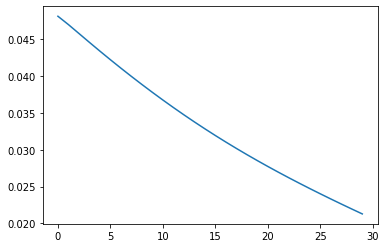

In [38]:
df_final = df_h.tolist()
df_final.extend(output_lst)
plt.plot(df_final[2868:])

In [39]:
df_final = scaler.inverse_transform(df_final).tolist()

In [40]:
df_final[2868:]

[[1.5986192297935486],
 [1.5715926041454078],
 [1.542845324650407],
 [1.5140369552746415],
 [1.4856367409974338],
 [1.4577612594515086],
 [1.4304520375281573],
 [1.4037293495982885],
 [1.377608134672046],
 [1.352099774852395],
 [1.3272131624072792],
 [1.3029546108469368],
 [1.279327410310507],
 [1.2563305826485158],
 [1.2339588814228775],
 [1.2122013691440225],
 [1.1910434624925257],
 [1.1704652427881956],
 [1.1504411892220379],
 [1.1309459588304163],
 [1.11194878436625],
 [1.093418053817004],
 [1.0753220217861237],
 [1.0576273422688247],
 [1.040302536636591],
 [1.023316215183586],
 [1.0066382775828242],
 [0.9902413801103831],
 [0.9740984458103776],
 [0.9581862658634782]]